In [3]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

### Medidas de dispersão

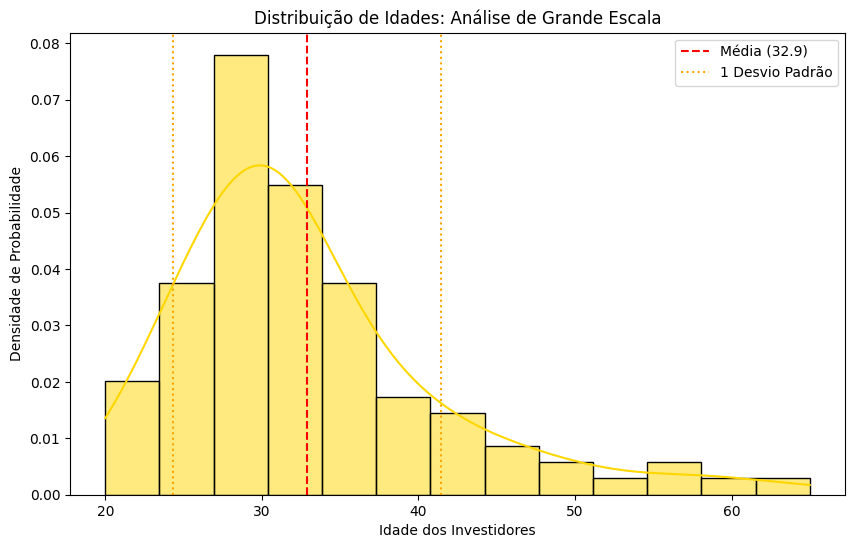

In [4]:

idades = [
    20, 21, 22, 22, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26,
    27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 30, 30,
    30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32,
    32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35, 36, 36, 36, 37, 37, 38,
    38, 39, 39, 40, 40, 41, 41, 42, 43, 44, 45, 46, 47, 48, 50, 52, 55, 58, 60, 65
]

df = pd.Series(idades)
media = df.mean()
dp = df.std()


plt.figure(figsize=(10, 6))
sns.histplot(idades, kde=True, color="gold", stat="density")


plt.axvline(media, color='red', linestyle='--', label=f'Média ({media:.1f})')
plt.axvline(media + dp, color='orange', linestyle=':', label='1 Desvio Padrão')
plt.axvline(media - dp, color='orange', linestyle=':')

plt.title('Distribuição de Idades: Análise de Grande Escala')
plt.xlabel('Idade dos Investidores')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.show()

In [5]:
def desvio_padrão_amostral(df:pd.DataFrame) -> float:
    n = len(df)
    media_amostral = sum(df) / n
    total = 0 
    for valor in df:
        total += (valor - media_amostral) ** 2
    desvio_padrao = total / (n-1)
    return np.sqrt(desvio_padrao)

print(desvio_padrão_amostral(df))

8.545652802342358


In [6]:
print(f"""
    Media -> {np.mean(df)}
    Media + 1 desvio -> {np.mean(df) + desvio_padrão_amostral(df)}
    Media - 1 desvio -> {np.mean(df) - desvio_padrão_amostral(df)}
    Insights:

    -> Conforme o grafico, a concentração de pessoas é maior a - 1 desvio padrão em relação a media do que a +1 desvio padrão em relação a media
    Indicando que, temos mais pessoas entre {np.mean(df) - desvio_padrão_amostral(df)} a {np.mean(df)} anos do que da media + 1 desvio padrão
    """)


    Media -> 32.89
    Media + 1 desvio -> 41.43565280234236
    Media - 1 desvio -> 24.34434719765764
    Insights:

    -> Conforme o grafico, a concentração de pessoas é maior a - 1 desvio padrão em relação a media do que a +1 desvio padrão em relação a media
    Indicando que, temos mais pessoas entre 24.34434719765764 a 32.89 anos do que da media + 1 desvio padrão
    


In [7]:
media = np.mean(df)
desvio_padrao = desvio_padrão_amostral(df)
desvio_padrao_posivo = media + desvio_padrao
desvio_padrao_negativo = media - desvio_padrao

print(f"""
    Quantidade pessoas media + 1 desvio padrão {len(df.loc[(df>=media) & (df<=desvio_padrao_posivo)])} 
    Quantidade pessoas media -1 desvio padrão {len(df.loc[(df<=media) & (df>=desvio_padrao_negativo)])}
""")


    Quantidade pessoas media + 1 desvio padrão 26 
    Quantidade pessoas media -1 desvio padrão 50



### Medidas de posição

In [8]:
idades

[20,
 21,
 22,
 22,
 23,
 23,
 23,
 24,
 24,
 24,
 24,
 25,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 26,
 27,
 27,
 27,
 27,
 27,
 28,
 28,
 28,
 28,
 28,
 28,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 30,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 32,
 32,
 32,
 32,
 33,
 33,
 33,
 33,
 33,
 34,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 36,
 36,
 36,
 37,
 37,
 38,
 38,
 39,
 39,
 40,
 40,
 41,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 52,
 55,
 58,
 60,
 65]

In [9]:
## fractis -> divisão do conjunto de dados em paetes iguais
## quartis, percentis e mediana

### Quartis -> divide um conjunto de dados em 4 partes iguais (quantidade de dados iguais nas 4 partes)

In [33]:
alturas = [1.70, 1.72, 1.75, 1.75, 1.78, 1.80, 1.82, 1.82, 1.85, 1.86]
mediana_altura = np.median(alturas)
# print(mediana_altura)
# print((1.78+1.80) / 2)
# print('Mediana foi calculado por 1.78 + 1.80 /2, pois, esses dados estão centrados no meu dataset')
for alt in alturas:
    if alt < mediana_altura:
        print(f'{alt} Limite inferior')
    elif alt == mediana_altura:
        print(f'{alt} altura igual a mediana')
    else:
        print(f'{alt} Limite superior')

# Q1 ignora o menor valor e vai até a mediana
# Q2 é a mediana mesmo
# Q3 vai da mediana até n-1 

# Sendo que:
# o valor do q1 é a mediana entre o segundo valor do conjunto até a mediana
# o valor do q3 é a mediana entre a mediana do conjunto até n-1




1.7 Limite inferior
1.72 Limite inferior
1.75 Limite inferior
1.75 Limite inferior
1.78 Limite inferior
1.8 Limite superior
1.82 Limite superior
1.82 Limite superior
1.85 Limite superior
1.86 Limite superior


In [43]:
investimentos = pd.DataFrame(
    {
        'Investidor': ['A','B','C','D','E','F','G','H','I','J','K','L'],
        'Aporte mensal' : [150,200,250,250,300,400,450,500,600,800,1500,4000]
    }
)

investimentos

,Investidor,Aporte mensal
0,A,150
1,B,200
2,C,250
3,D,250
4,E,300
5,F,400
6,G,450
7,H,500
8,I,600
9,J,800


In [67]:
def desvio_padrao_function(dt:pd.DataFrame,colum:str) -> float:
    """ Função que calcula o desvio padrão utilizando um dataset considerado populacional

        Args:
            dt: Dataset do tipo pandas DataFrame
            colum: coluna do dataset em questão, que eu quero trabalhar

        Variables:
            x_barra: media populacional da coluna do dataset passado no argumento
            N: numero de correncias do dataset na coluna desejada
            valor: valor inicial 0 para soma acumulada
            desvio: raiz do total acumulado da variavel valor / N
        
        Returns:
                Irá retornar um valor float do desvio padrão calculdo
    """
    x_barra = np.average(dt[colum])
    N = len(dt[colum])
    valor = 0
    for value in dt[colum]:
        valor += (value - x_barra) **2
    desvio = np.sqrt(valor / N )
    return desvio


def coe_variacao(dt:pd.DataFrame,colum:str) -> float:
    """ Função que calcula o coeficiente da variação do desvio padrao

    Args:
        dt: dataframe do tipo pandas
        colum: coluna do dataframe que eu quero trabalhar
        
    Returns:
        chama a função do desvio padrão pelo qual calcula o mesmo, e divide pela media do mesmo * 100 para transformar em %
    
    """
    return (desvio_padrao_function(dt=dt,colum=colum) / np.average(dt[colum])) * 100

In [66]:
print(f"""
    Medidas:
    
        Media -> {np.average(investimentos['Aporte mensal'])}
        Mediana -> {np.median(investimentos['Aporte mensal'])}
    
    Insight:
    
        Desvio padrão -> {desvio_padrao_function(dt=investimentos,colum='Aporte mensal')}
        Coef variancia -> {coe_variacao(dt=investimentos,colum='Aporte mensal')}%

        Entendemos que o coeficiente da variancia esta altissima, oque podemos entender que a media não é boa para entendermso a media dos investimentos, pois, varia muito em relação a media dos investimentos
""")


    Medidas:
    
        Media -> 783.3333333333334
        Mediana -> 425.0
    
    Insight:
    
        Desvio padrão -> 1031.853779477607
        Coef variancia -> 131.72601440139664%

        Entendemos que o coeficiente da variancia esta altissima, oque podemos entender que a media não é boa para entendermso a media dos investimentos, pois, varia muito em relação a media dos investimentos



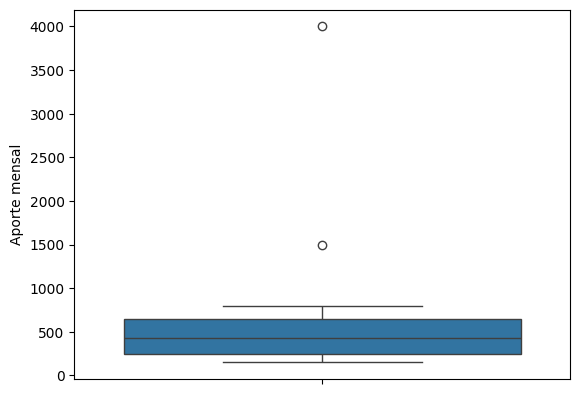

In [51]:
sns.boxplot(investimentos['Aporte mensal']);

In [68]:
investimentos

,Investidor,Aporte mensal
0,A,150
1,B,200
2,C,250
3,D,250
4,E,300
5,F,400
6,G,450
7,H,500
8,I,600
9,J,800


In [69]:
dados = pd.read_csv(r'C:\Users\Mateus\Desktop\Machine Learning com Python\4-Medidas de dispersão e de posição\MedidasDispersãoPosição\BankCustomerData.csv')
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


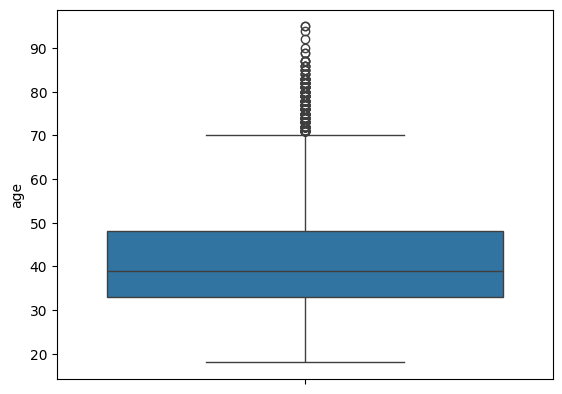

In [70]:
sns.boxplot(dados['age']);

In [99]:
print(f"""
    25% dos clientes tem idade de 18 até 33 anos
    50% dos clientes tem idade de até 39 anos
    75% dos clientes tem idade até 48 anos
    E 25% dos clientes tem idade de 48 anos até 90+ 

    
    Intervalo interquartil

    50% dos clientes com idade entre 33 a 48 anos de idade
""")


    25% dos clientes tem idade de 18 até 33 anos
    50% dos clientes tem idade de até 39 anos
    75% dos clientes tem idade até 48 anos
    E 25% dos clientes tem idade de 48 anos até 90+ 

    
    Intervalo interquartil

    50% dos clientes com idade entre 33 a 48 anos de idade

